# Ejemplo Práctico: Generación de Imágenes con StyleGAN2 - Pablo García Muñoz


## Paso 1: Configuración del Entorno
Uso la versión PyTorch de StyleGAN2 para evitar dependencias con TensorFlow.

In [ ]:
# Clono el repositorio de StyleGAN2-ADA PyTorch (versión mejorada)
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

# Navego al directorio del repositorio
%cd stylegan2-ada-pytorch

# Instalo las dependencias necesarias
!pip install torch torchvision numpy scipy pillow

## Paso 2: Descargar el Modelo Preentrenado
Utilizo el modelo FFHQ (rostros humanos).

In [ ]:
# Descargo un modelo preentrenado
!mkdir models
!wget -O models/ffhq.pkl https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

## Paso 3: Generar Imágenes Aleatorias
Uso el script oficial para generar imágenes.


In [6]:
import torch
import numpy as np
from PIL import Image
import dnnlib
import legacy

# Cargar el modelo preentrenado
network_pkl = "models/ffhq.pkl"
with open(network_pkl, "rb") as f:
    G = legacy.load_network_pkl(f)['G_ema']  # Red generativa

# Función para generar imágenes aleatorias
def generate_images(G, seed, truncation_psi=0.7):
    torch.manual_seed(seed)
    z = torch.randn([1, G.z_dim])  # Vector latente aleatorio
    c = None  # Sin condicionales
    img = G(z, c, truncation_psi=truncation_psi, noise_mode='const', force_fp32=True)
    img = (img + 1) * (255 / 2)
    img = img.clamp(0, 255).to(torch.uint8)
    img = img[0].permute(1, 2, 0).cpu().numpy()
    return Image.fromarray(img, 'RGB')

# Generar y mostrar una imagen
image = generate_images(G, seed=42)
image.show()

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 19.62 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2/stylegan2-ada-pytorch/stylegan2-ada-pytorch/stylegan2-ada-pytorch
--2025-02-15 11:36:04--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 18.238.243.57, 18.238.243.68, 18.238.243.45, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|18.238.243.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘models/ffhq.pkl’

models/ffhq.pkl     100%[===================>] 363.94M   193MB/s    in 1.9s    

2025-02-15 11:36:06 (193 MB/s) - ‘models/ffhq.pkl

## Paso 4: Generar Múltiples Imágenes
Se puede generar varias imágenes modificando el valor de la semilla.

In [ ]:
# Generar varias imágenes
for seed in [10, 20, 30, 40, 50]:
    image = generate_images(G, seed=seed)
    image.show()

## Paso 5: Guardar las Imágenes Generadas
Guardo las imagenes.

In [ ]:
# Guardar una imagen generada
output_path = "imagen_generada_pytorch_cpu.jpg"
image.save(output_path)
print(f"Imagen guardada en {output_path}")

## Paso 6: Muestro un ejemplo

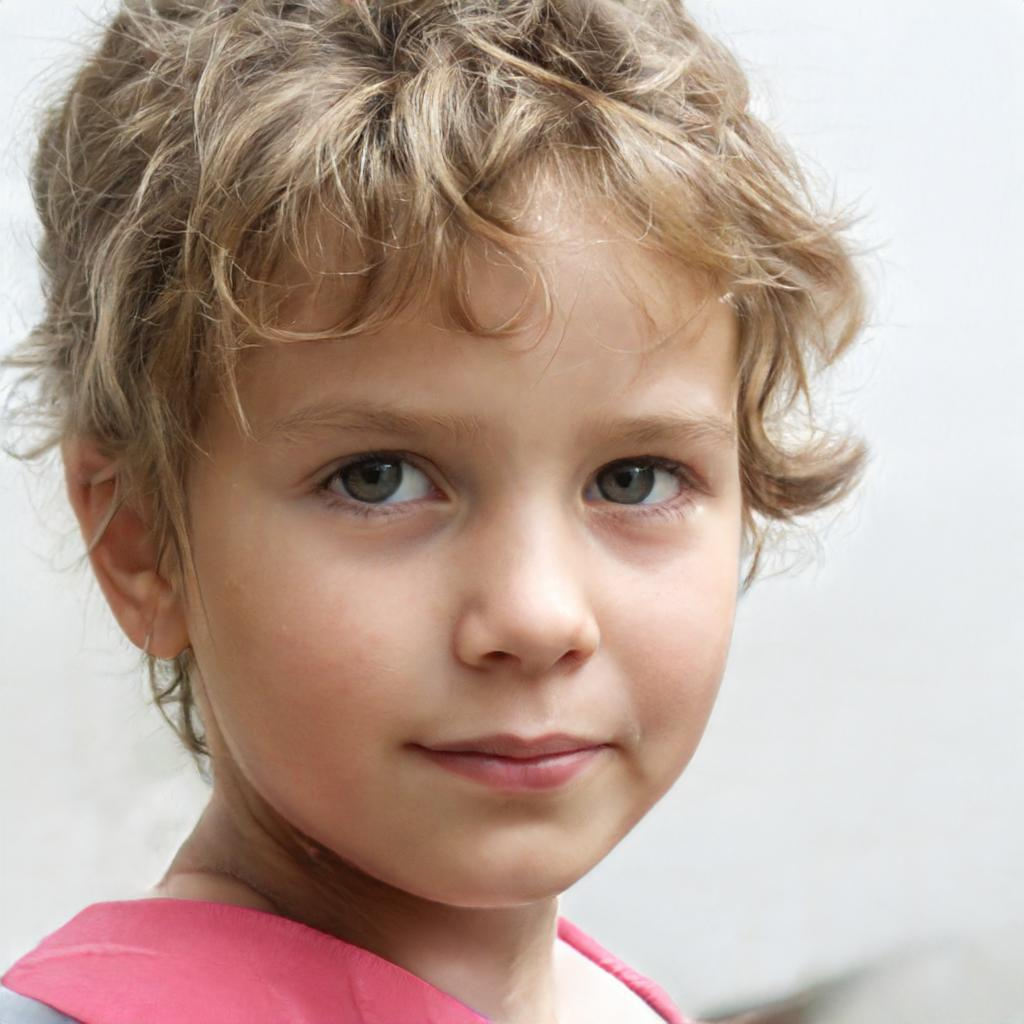

In [7]:
from IPython.display import Image

Image(filename='imagen_generada_pytorch_cpu.jpg')

# Conclusión
Usando un modelo ya creado basado en el **StyleGAN2** creo la cara de una persona al estilo de la página web de ThisPersonDoesNotExist.
